<a href="https://colab.research.google.com/github/YazCodes/heartRatePrediction/blob/main/Lorenz_heart_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib


In [54]:
#load the data 
df = pd.read_csv('/content/PT_Train.csv')

df.head() #look at the data

#print(f'Number of entries: {len(df)}') #print number of data entries 


,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


In [55]:
#Data cleaning  - Important step as the ML model and data processing cannot start if the dataset contains missing values

df.isnull().values.any() #This shows if there are any missing values in the dataset. True = yes false = No

#df = df.dropna() #drop any rows with missing values 

df= df.drop(['Lifetouch Respiration Rate', 'Oximeter SpO2','Oximeter Pulse'], axis= 'columns')

df.head()


,Timestamp (GMT),Lifetouch Heart Rate
0,17/08/2015 15:09,139
1,17/08/2015 15:10,144
2,17/08/2015 15:11,140
3,17/08/2015 15:12,138
4,17/08/2015 15:13,133


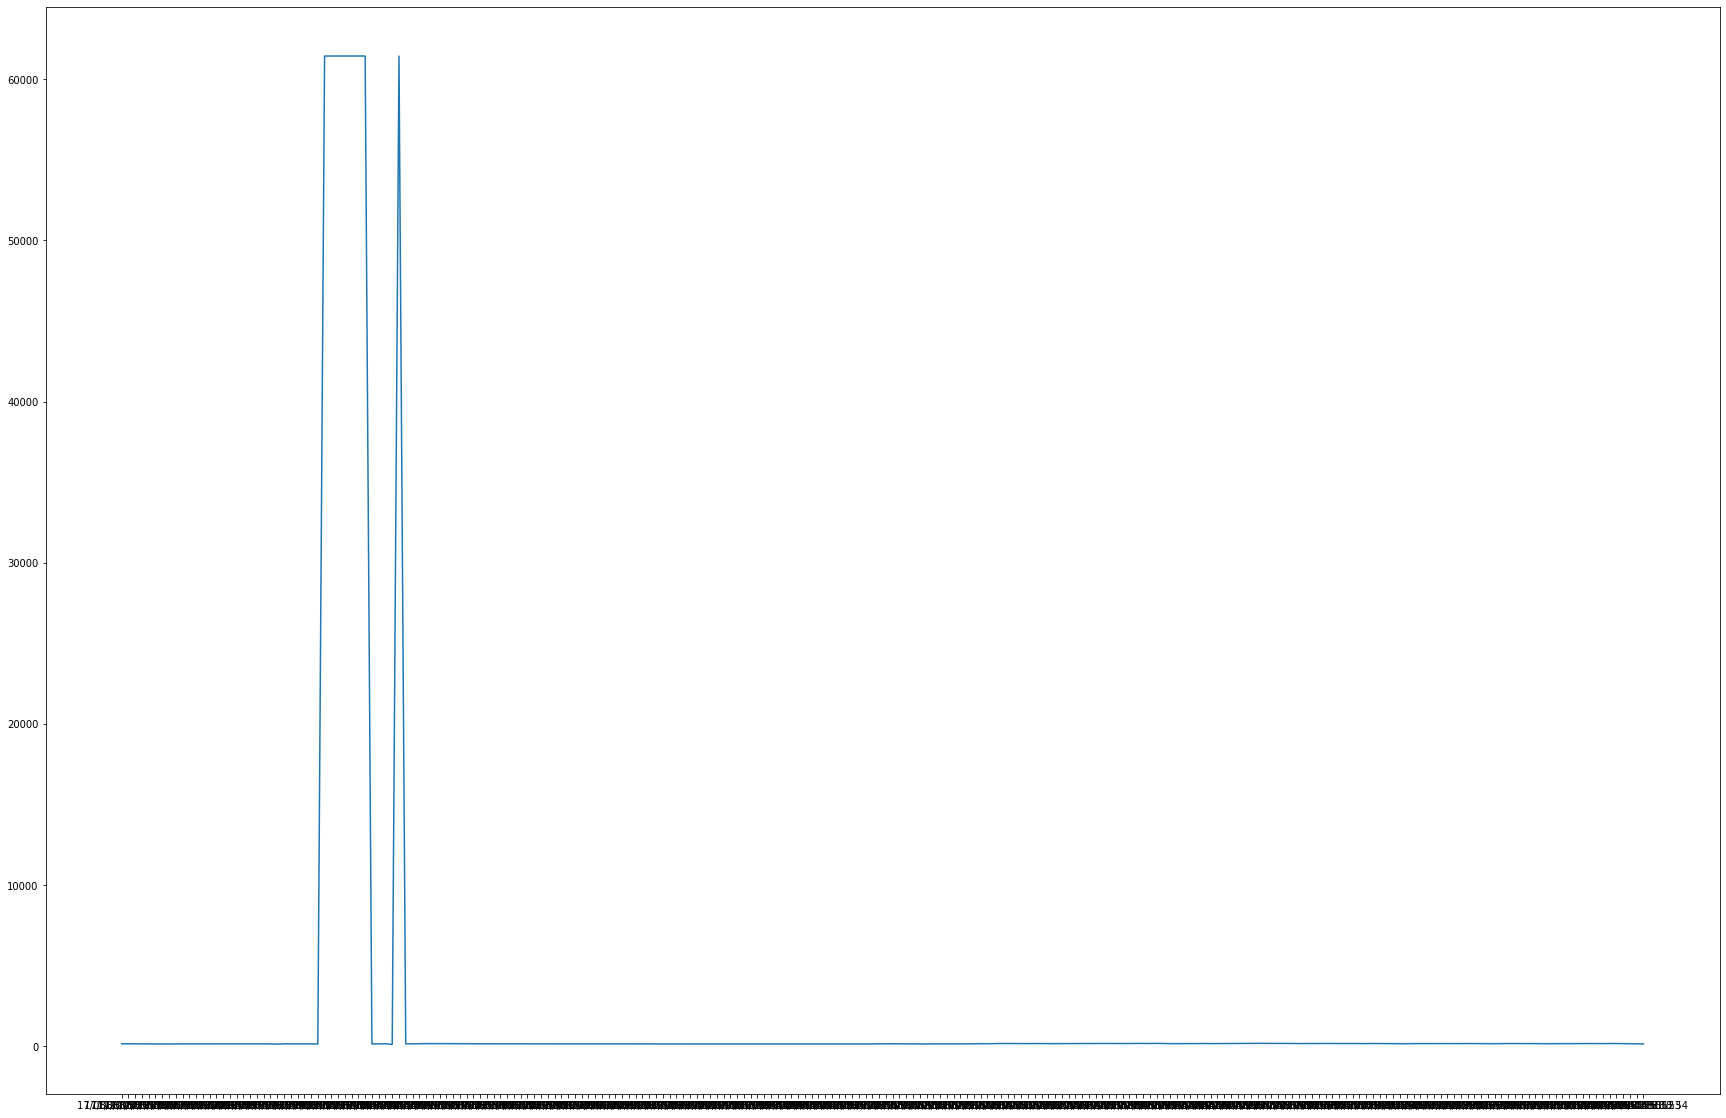

In [56]:
#Plot your data 

plt.plot(df['Timestamp (GMT)'],df['Lifetouch Heart Rate'])

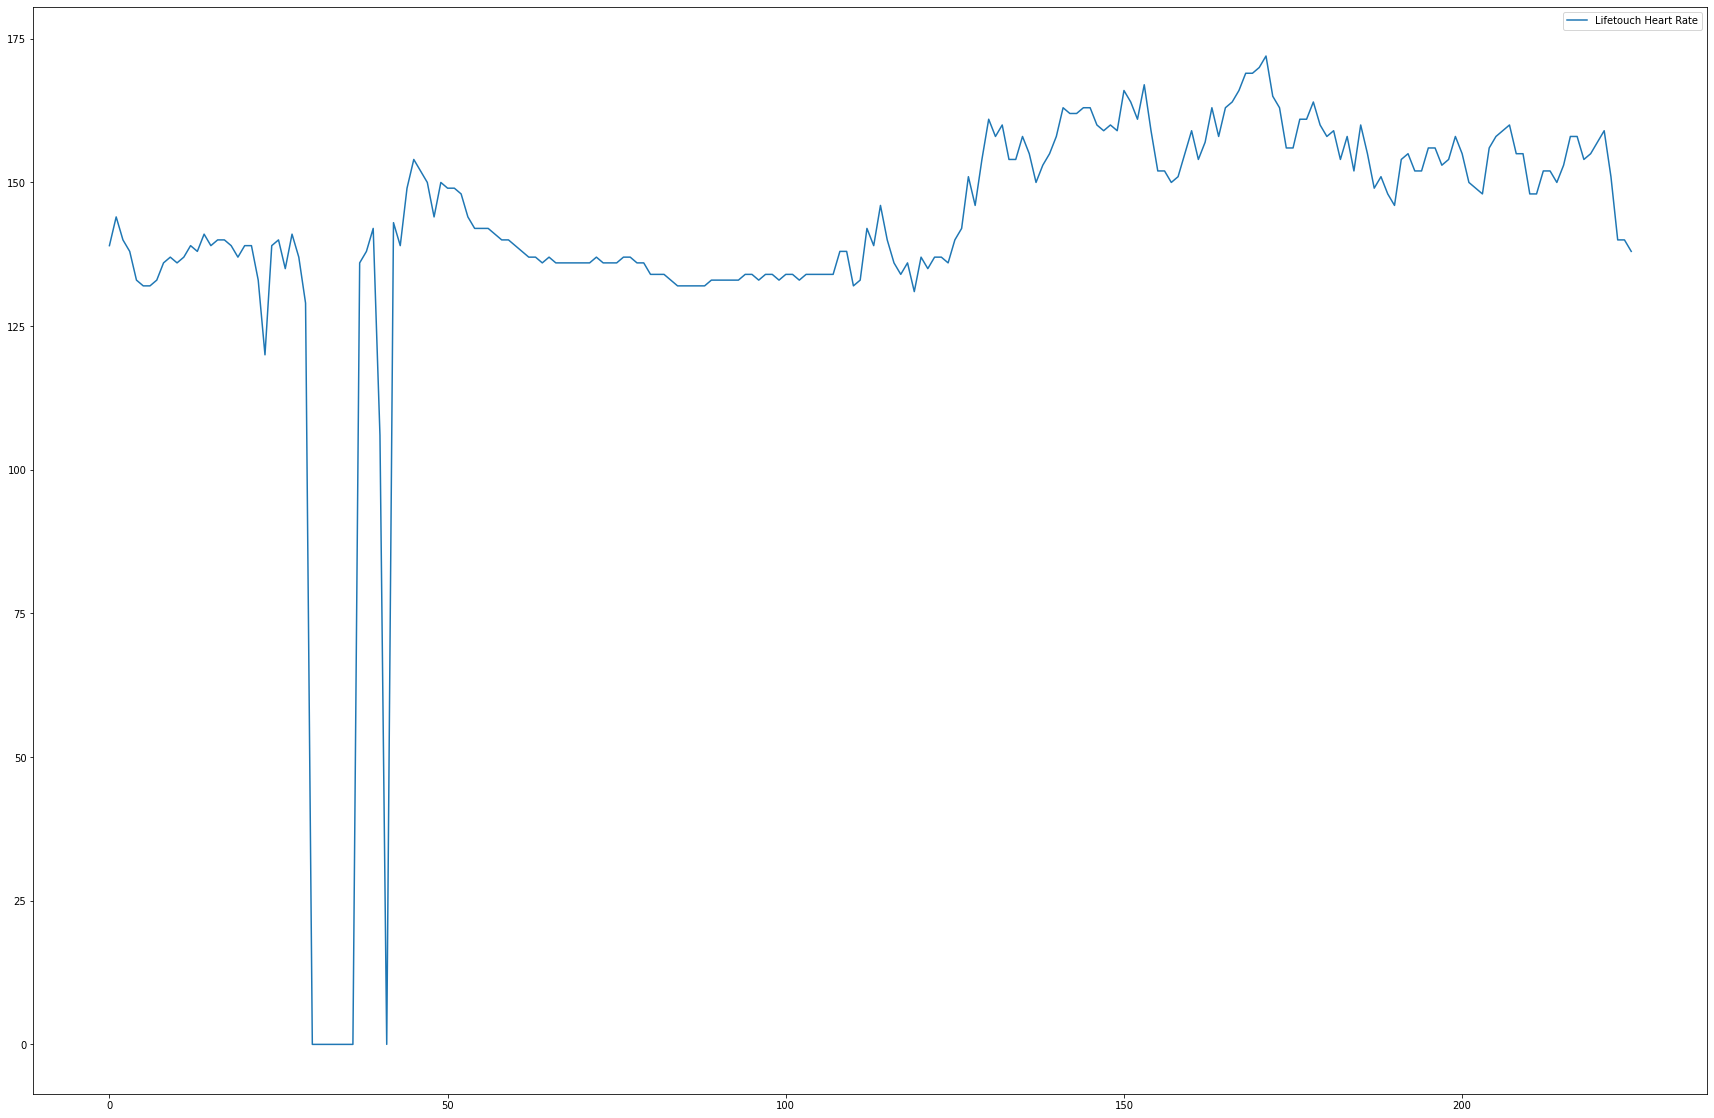

In [58]:
#Cut off function
def cutoff(row):
    vals = row
    if vals>1000:
        vals = 0  #Any value > 1000 will be set to 0 
    return vals

matplotlib.rc('figure', figsize=(30, 20))
df['Lifetouch Heart Rate'] = df['Lifetouch Heart Rate'].apply(cutoff)
df.plot()

In [59]:
#Data cleaning continued 
print("Number of null values:")
print(sum(df['Lifetouch Heart Rate'].isnull()))
print("Number of N\A values:")
print(sum(df['Lifetouch Heart Rate'].isna()))
print("Number of low values (>2000):")
print(sum(df['Lifetouch Heart Rate']> 2000)) #leave this after first time at 8 vales

Number of null values:
0
Number of N\A values:
0
Number of low values (>2000):
0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)



Result: the time series is not stationary



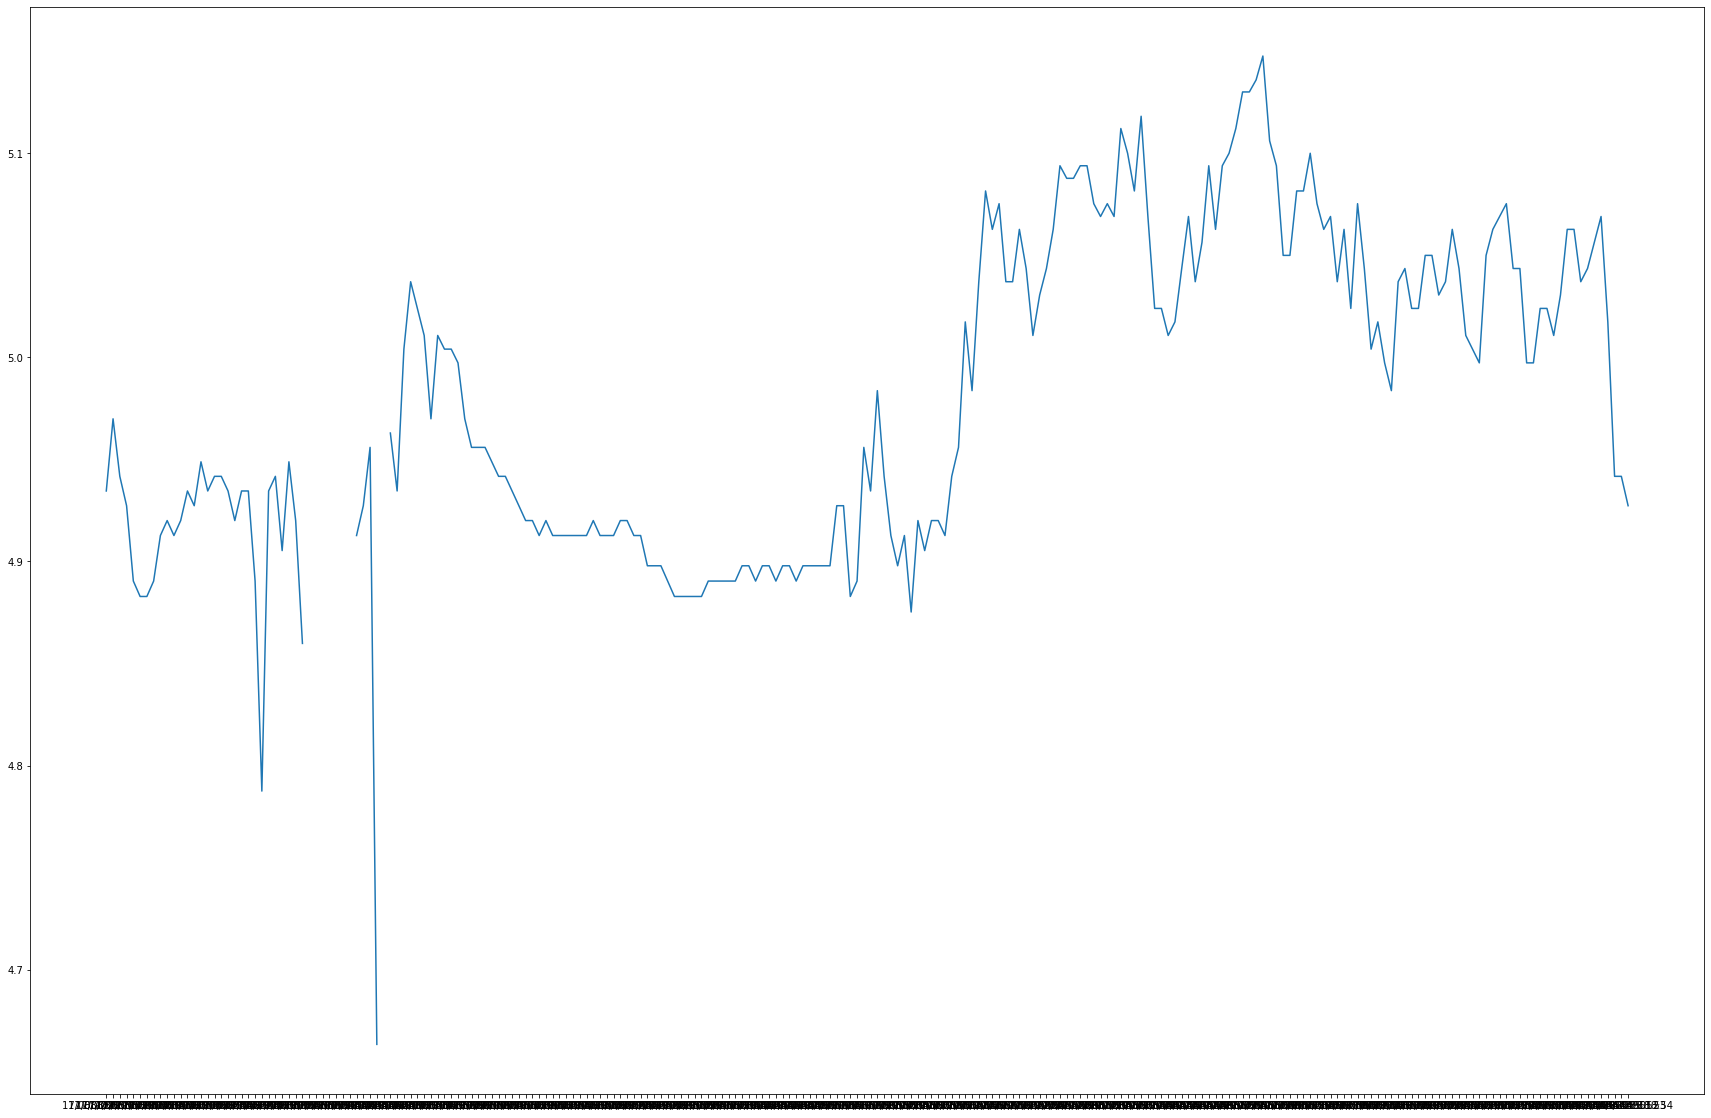

,Timestamp (GMT),Lifetouch Heart Rate,stationary
0,17/08/2015 15:09,139,4.934474
1,17/08/2015 15:10,144,4.969813
2,17/08/2015 15:11,140,4.941642
3,17/08/2015 15:12,138,4.927254
4,17/08/2015 15:13,133,4.890349


In [60]:
#Step one - check if data is stationary using the KPSS test 
df['stationary'] = np.log(df['Lifetouch Heart Rate'])

statistic,p_value,n_lags,critical_values= sm.tsa.stattools.kpss(df['Lifetouch Heart Rate'])
print(f'\nResult: the time series is {"not" if p_value <0.05 else""} stationary\n')

plt.plot(df['Timestamp (GMT)'],df['stationary'])
plt.show()
df.head()

In [61]:
df.head()

,Timestamp (GMT),Lifetouch Heart Rate,stationary
0,17/08/2015 15:09,139,4.934474
1,17/08/2015 15:10,144,4.969813
2,17/08/2015 15:11,140,4.941642
3,17/08/2015 15:12,138,4.927254
4,17/08/2015 15:13,133,4.890349


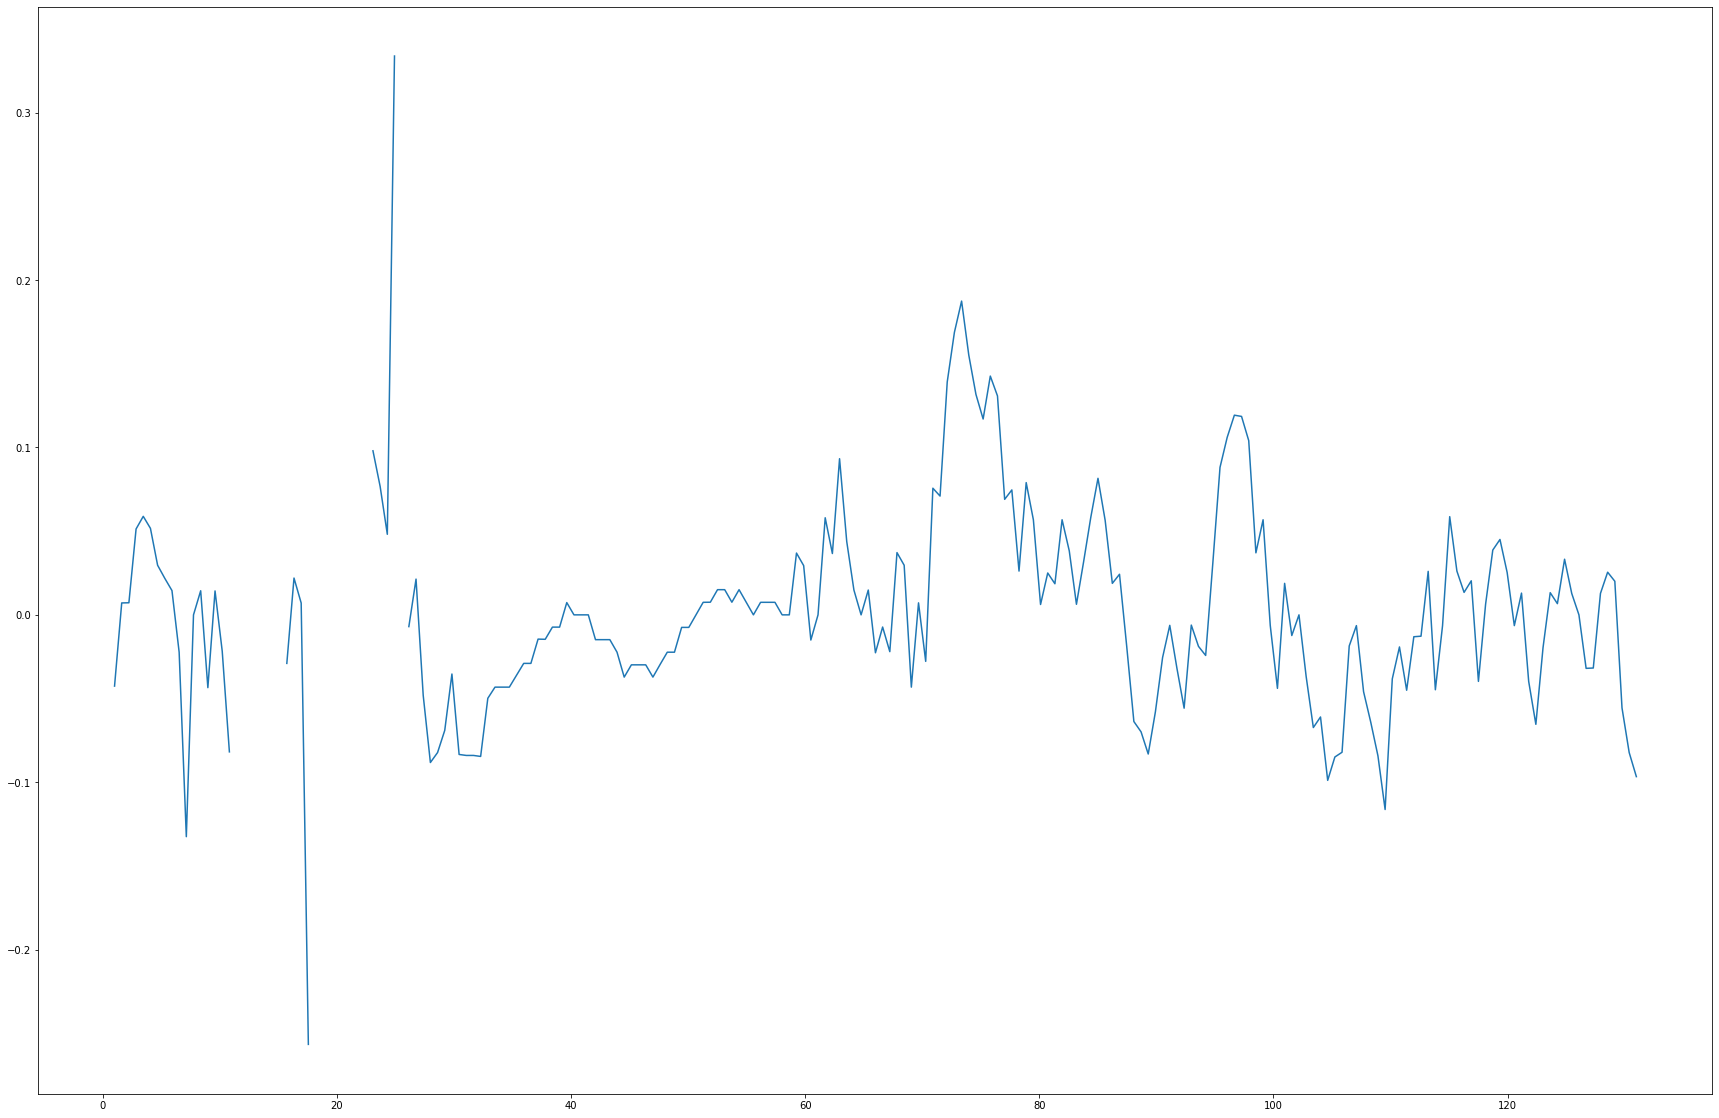

In [63]:
#Needs to make it stationary 

mons = df.pop('Timestamp (GMT)')
u = df.iloc[1]['stationary'] # swap around the order 
df=df.diff(axis=0,periods=12) # every 1st and 12th row it does what is being asked then 14th 2nd - accounts for the peaks 

plt.plot(np.linspace(1,131,213),df['stationary'][13:])
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)



Result: The series is stationary



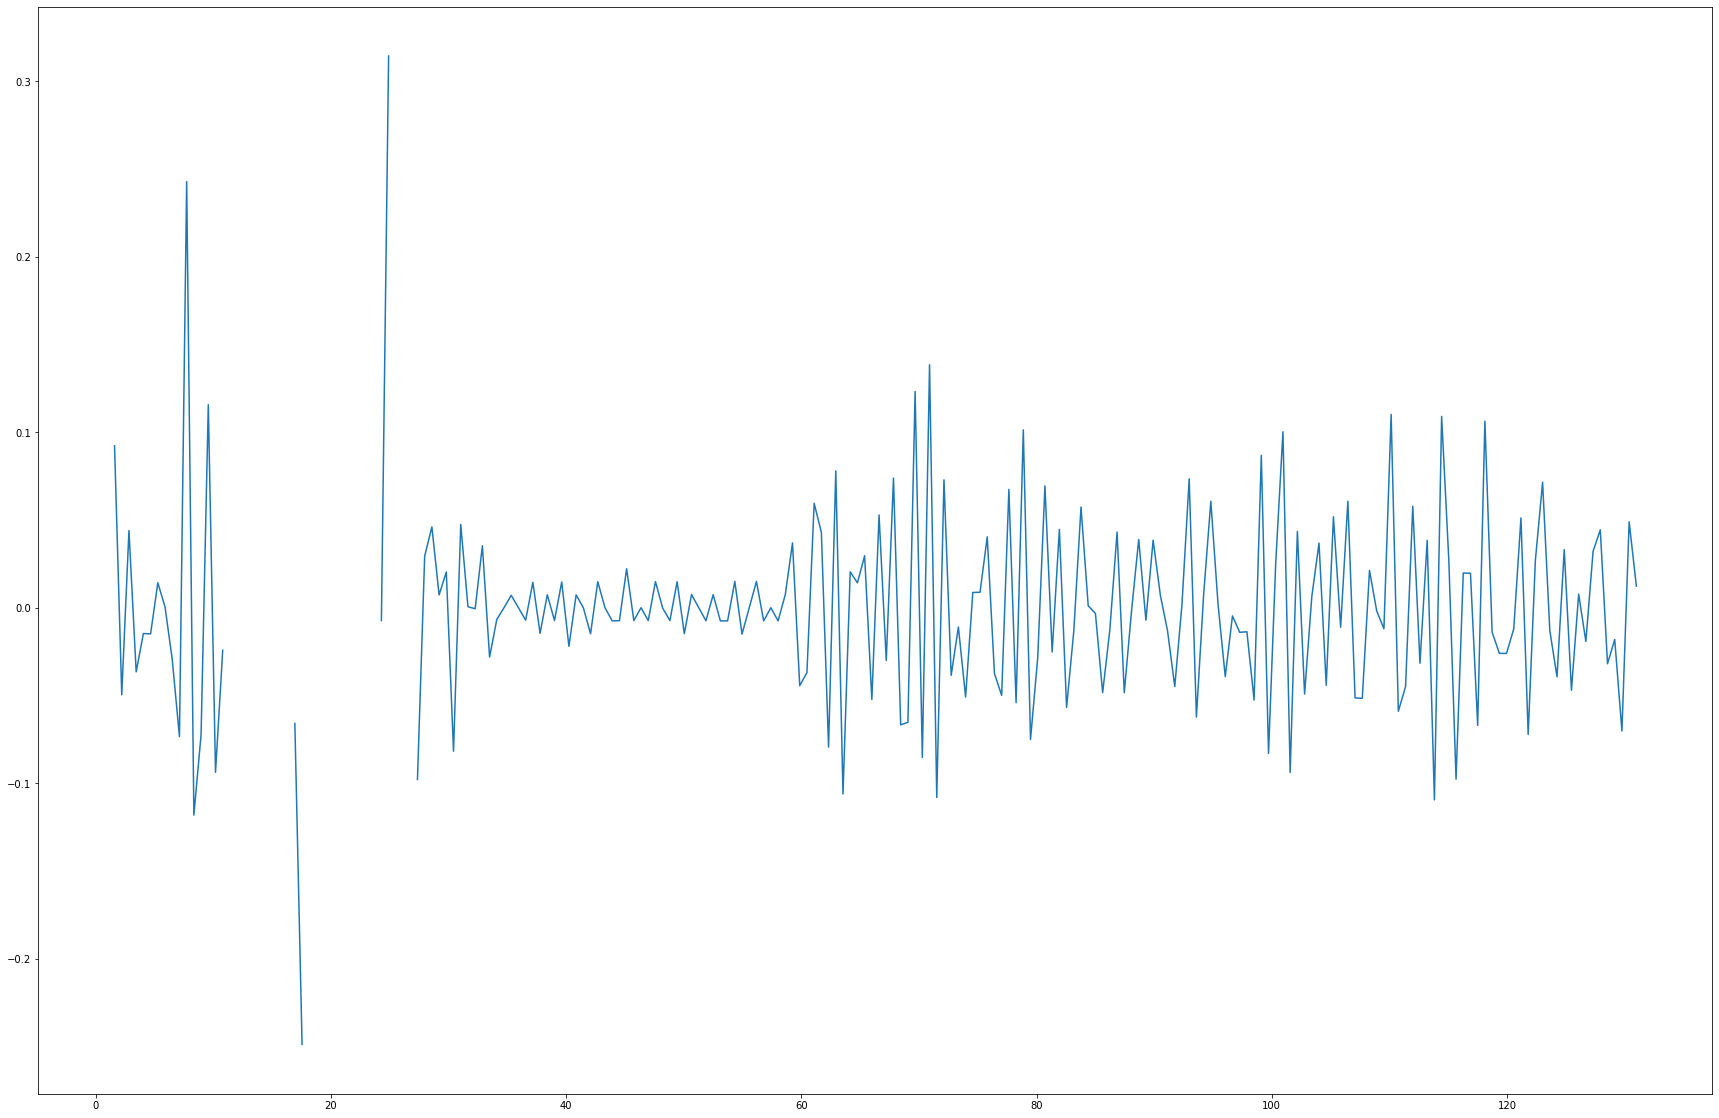

,Lifetouch Heart Rate,stationary
221,-5.0,-0.031911
222,-3.0,-0.018070
223,-10.0,-0.070226
224,7.0,0.048969
225,2.0,0.012280


In [65]:

u = df.iloc[13]['stationary']
df = df.diff(axis=0)

statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(df['stationary'])
print(f'\nResult: The series is {"not " if p_value < 0.05 else ""}stationary\n')

plt.plot(np.linspace(1,131,213),df['stationary'][13:])
plt.show()
df.tail()